In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nx = 101
nt = 100
dx = 2 * np.pi / (nx - 1)
mu = .07
dt = dx * mu

From the notes, the one-dimensional Burgers' equation time marching becomes: $u_{i}^{n+1} = u_{i}^{n} -u_{i}^{n} \frac{\Delta t}{\Delta x}(u_{i}^{n} - u_{i-1}^n) +\frac{\mu\Delta t}{\Delta x^2}(u_{i+1}^{n} - 2u_{i}^{n} + u_{i-1}^n)$

Initial condition given by:
$$ u = -\frac{2\mu}{\phi}\frac{\partial\phi}{\partial x} + 4 $$
$$ \phi = \exp{\frac{-x^2}{4\mu}} + \exp{\frac{-(x-2\pi)^2}{4\mu}}$$


Exact solution given by:
$$ u = -\frac{2\mu}{\phi}\frac{\partial\phi}{\partial x} + 4 $$
$$ \phi = \exp{\frac{-(x-4t)^2}{4\mu(t+1)}} + \exp{\frac{-(x-4t-2\pi)}{4\mu(t+1)}}$$

Boundary condition given by:
$$u(0) = u(2\pi) $$

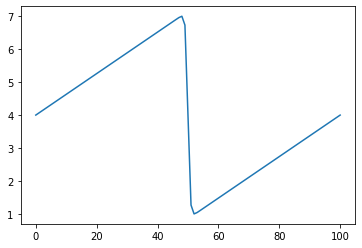

In [ ]:
t = 0
x = np.arange(0,2*np.pi+dx,dx)
phi = np.exp(-x**2 / (4*mu)) + np.exp(-(x-2*np.pi)**2/(4*mu))
phi_x = -(-8*t + 2*x)*np.exp(-(-4*t + x)**2/(4*mu*(t + 1)))/(4*mu*(t + 1)) - (-8*t + 2*x - 4*np.pi)*np.exp(-(-4*t + x - 2*np.pi)**2/(4*mu*(t + 1)))/(4*mu*(t + 1))
plt.plot(-2*mu/phi * phi_x + 4)

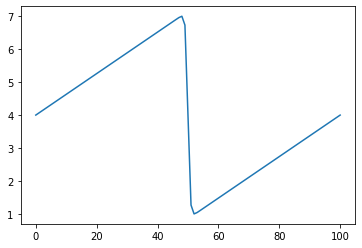

In [ ]:
U = np.zeros((nt,nx))
U[0] = -2*mu/phi * phi_x + 4
plt.plot(U[0])

In [ ]:
for n in range(1, nt):
  un = U[n-1].copy()
  temp = np.ones(nx)
  for i in range(1, nx-1):
    
    temp[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + mu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
  U[n] = temp
  U[n,0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + mu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])

  U[n,-1] = U[n,0]

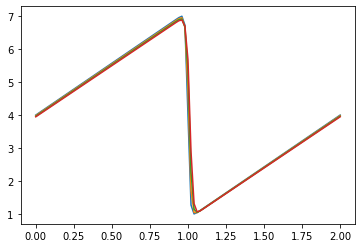

In [ ]:
plt.plot(np.linspace(0, 2, nx),U[0])
plt.plot(np.linspace(0, 2, nx),U[1])
plt.plot(np.linspace(0, 2, nx),U[2])
plt.plot(np.linspace(0, 2, nx),U[3])

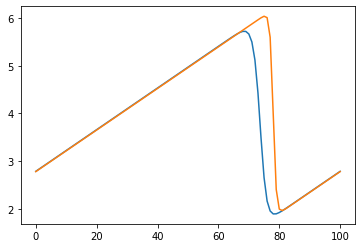

In [ ]:
#plt.plot(np.linspace(0, 2, nx),U[-4])
#plt.plot(np.linspace(0, 2, nx),U[-3])
#plt.plot(np.linspace(0, 2, nx),U[-2])
plt.plot(U[-1])
t = nt*dt
x = np.arange(0,2*np.pi+dx,dx)
phi = np.exp(-(x-4*t)**2 / (4*mu*(t+1))) + np.exp(-(x-2*np.pi-4*t)**2/(4*mu*(t+1)))
phi_x = -(-8*t + 2*x)*np.exp(-(-4*t + x)**2/(4*mu*(t + 1)))/(4*mu*(t + 1)) - (-8*t + 2*x - 4*np.pi)*np.exp(-(-4*t + x - 2*np.pi)**2/(4*mu*(t + 1)))/(4*mu*(t + 1))
plt.plot(- 2*mu/phi * phi_x + 4)